In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df=pd.read_csv('walmart_data.csv')

In [3]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.shape[0]

550068

In [6]:
sample_size= df.shape[0]

In [7]:
#unique users in different genders
df.groupby('Gender')['User_ID'].nunique()


Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [8]:
#distribution of gender
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [9]:
#Check different metrics on purchase by different genders
df.groupby('Gender')['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


<Axes: xlabel='Gender', ylabel='Purchase'>

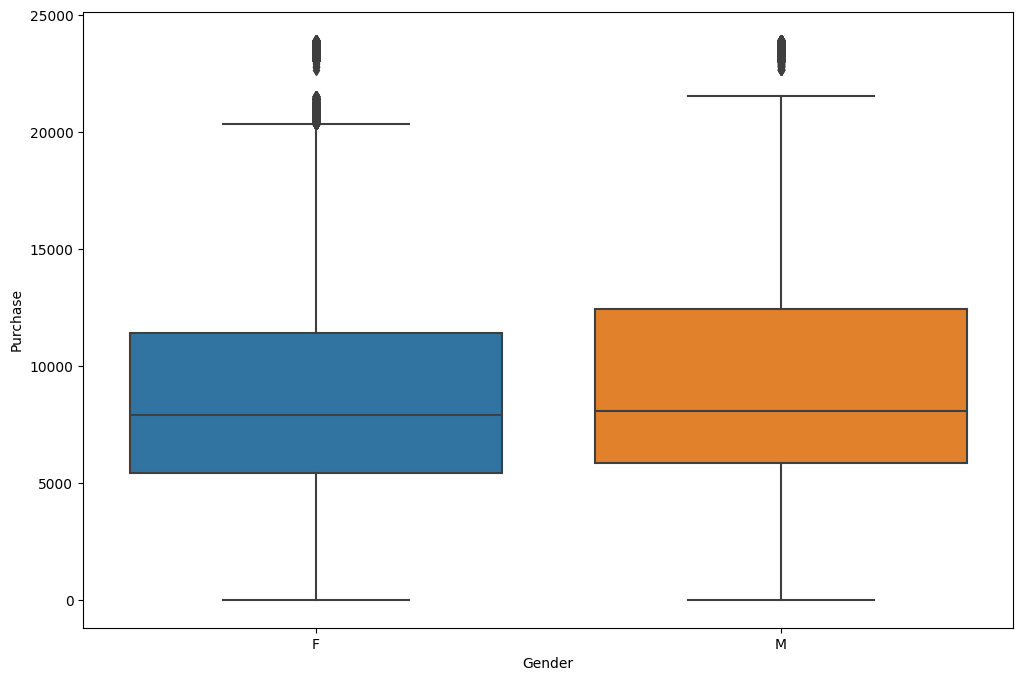

In [10]:
plt.figure(figsize=(12,8))
sbn.boxplot(x='Gender', y='Purchase', data=df)

In one month, 1666 Females are spending mean -8734.565765 & median - 7914.0 4225 Males are spending mean- 9437.526040 Median - 8098.0

In [11]:
#Check ratio of males to female
4225/1666

2.536014405762305

<Axes: xlabel='Age', ylabel='count'>

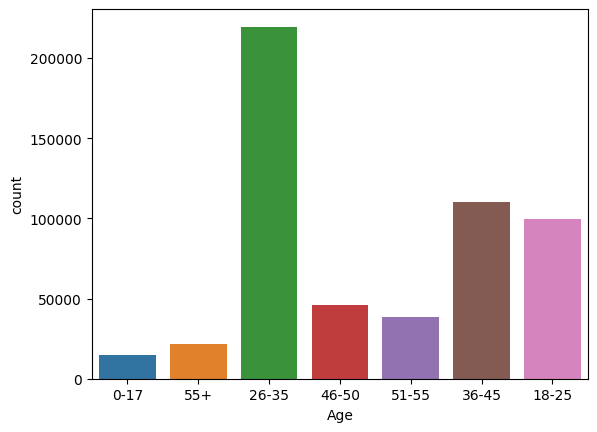

In [12]:
sns.countplot(x = df['Age'], data=df )

# Checking through visualization:

<Figure size 2000x800 with 0 Axes>

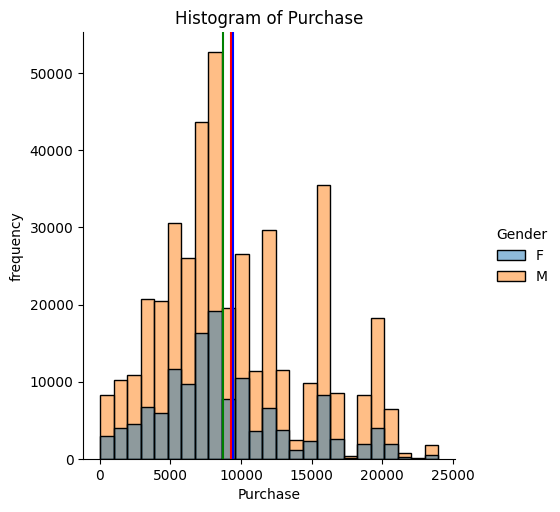

In [13]:
plt.figure(figsize=(20,8))
sbn.displot(x='Purchase', data=df, bins=25,hue='Gender')
plt.xlabel('Purchase')
plt.ylabel('frequency')
plt.title('Histogram of Purchase')
plt.axvline(x=df['Purchase'].mean(),color='r')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(),color='b')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(),color='g')

We can see that the distribution is close to normal.

In [14]:
#checking mean and standard deviation
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [15]:
df[df['Gender']=='F']['Purchase'].mean()

8734.565765155476

In [16]:
df[df['Gender']=='F']['Purchase'].std()

4767.233289291444

Thinking of this dataset as population. Let's  rst check if applying CLT on it's sample gives us actual characteris of the population or not.
Let us take a random sample (size = 300) from this data to analyse the sample mean.


In [17]:
df.sample(300).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,81.0,9824.728395,4788.860057,2754.0,6133.0,8621.0,13153.0,20673.0
M,219.0,9259.954338,4644.420087,61.0,6106.0,8019.0,11683.5,20594.0


Every time we take a sample, o ur mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let’s assess this. Let us pick around 1,000 random samples of size 300 from the entire data set and calculated the mean of each sample.

In [18]:
male_sample_means=[df[df['Gender']=='M']['Purchase'].sample(300).mean() for i in range(1000)]

In [19]:
female_sample_means=[df[df['Gender']=='F']['Purchase'].sample(300).mean() for i in range(1000)]

# 95% Confidence Interval

In [20]:
## Calculation for 95% confidence interval for males
wm_male = df.loc[df['Gender'] == 'M']
Z95 = stats.norm.ppf(0.95)
male_txn =wm_male.Purchase
reps = 300
mll = male_txn.mean() - (Z95 * (male_txn.std()/np.sqrt(reps))) 
mhl = male_txn.mean() + (Z95 * (male_txn.std()/np.sqrt(reps))) 
[mll, mhl]

[8953.943173291711, 9921.108907652819]

In [21]:
## Calculation for 95% confidence interval for females

wm_female = df.loc[df['Gender'] == 'F']
Z95 = stats.norm.ppf(0.95)
female_txn =wm_female.Purchase
reps = 300
wll = female_txn.mean() - (Z95 * (female_txn.std()/np.sqrt(reps))) 
whl = female_txn.mean() + (Z95 * (female_txn.std()/np.sqrt(reps))) 
[wll, whl]

[8281.842269277136, 9187.289261033815]

In [22]:
overlap = np.abs(mll-whl) 
overlap

233.34608774210392

In [23]:
span = np.abs(mhl-wll) 
span

1639.2666383756823

In [24]:
overlap_percent = (overlap/span * 100).round(2)
overlap_percent

14.23

Plot the distribution of all these sample means (This is our sampling distribution).

# Applying Central Limit Theorem

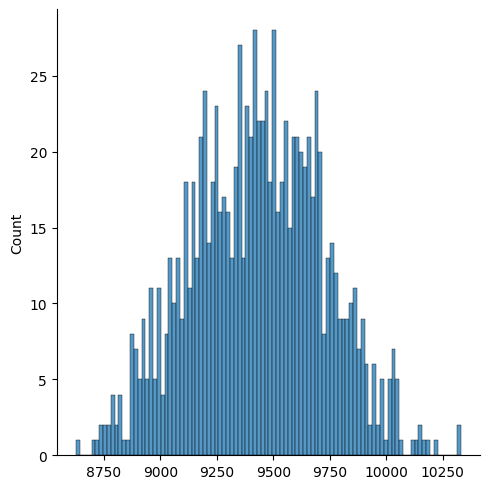

In [25]:
sbn.displot(male_sample_means,bins=100)

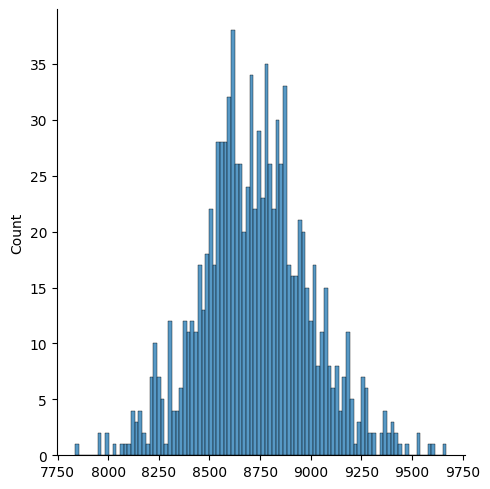

In [26]:
sbn.displot(female_sample_means, bins=100)

We can observe that the sampling distribution is nearly normal. Now we will compute the mean and standard deviation of this sampling distribution.

In [27]:
pd.Series(male_sample_means).mean()

9430.021986666667

In [28]:
pd.Series(female_sample_means).mean()

8729.058083333332

The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean. This demonstrates the  rst property of the Central Limit theorem
Sampling Distribution mean= Population Mean

However, it would not be fair to infer that the population mean is exactly equal to the sample mean. It is because the defects in the sampling process always tend to cause some errors. Therefore, the sample mean’s value must be reported with some margin of error.

In [29]:
pd.Series(male_sample_means).std()

294.61950402103855

In [30]:
pd.Series(male_sample_means).std()/np.sqrt(1000)

9.316686758156182

Now that we have veri ed these two properties, let us observe the effect of sample size on the resulting sampling distribution. In this demonstration, we will observe that as the sample size increases, the underlying sampling distribution will approximate a normal distribution.

# Applying Confidence Interval

In [31]:
#95% Confidence Interval
lower_limit_female = ((pd.Series(female_sample_means).mean()) - ((pd.Series(female_sample_means).std()/np.sqrt(1000))*1.96))
upper_limit_female = ((pd.Series(female_sample_means).mean()) + ((pd.Series(female_sample_means).std()/np.sqrt(1000))*1.96))
lower_limit_female, upper_limit_female

(8712.382858362616, 8745.733308304047)

In [32]:
lower_limit_male = pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/np.sqrt(1000))*1.96
upper_limit_male = pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/np.sqrt(1000))*1.96
lower_limit_male, upper_limit_male

(9411.76128062068, 9448.282692712653)

/var/folders/jm/7r67wmqx3z15yqc7zh1sp04m0000gn/T/ipykernel_8462/3396541431.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='blue')


([<matplotlib.axis.YTick at 0x169f66d40>,
 [Text(0, 0, 'Male'), Text(0, 1, 'Female')])

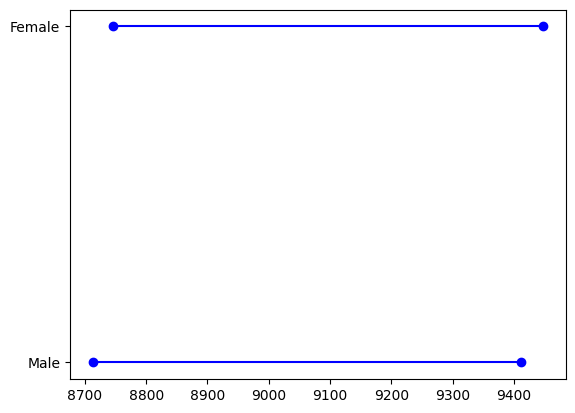

In [33]:
data_dict = {}
data_dict['category'] = ['Male','Female']
data_dict['lower'] = [lower_limit_male,upper_limit_male]
data_dict['upper'] = [lower_limit_female,upper_limit_female]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='blue')
plt.yticks(range(len(dataset)),list(dataset['category']))
